In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import networkx as nx

import yfinance as yf 

In [2]:
#!pip install yfinance

In [3]:
def find_profit(df):
    for i in range(0, df["Open"].shape[1]):
        pr = []
        for j in range(df["Open"].shape[0]):
            pr.append(np.log(df['Close'][df.columns[i][1]][j]) - np.log(df['Open'][df.columns[i][1]][j]))
        df[("Profit", df.columns[i][1])] = pr
    return df

In [4]:
def find_final_profit(list):
    return np.mean(list)

In [5]:
def find_std(list):
    return np.std(list)

In [6]:
def find_VaR(list, confidence):
    varisk = 0
    list.sort()
    print(list)
    list = np.array(list)
    for elem in list:
        temp_var = len(list[list <= -1 * elem]) / len(list)
        
        if temp_var >= confidence:
           varisk = elem
    return varisk           

In [7]:
def generate_portfolios(portfolio_size, param):
    ratio_list = []
    ratio = []
    for i in range(portfolio_size):
        ratio.append(param / (param + 1) ** (i + 1))
    for i in range(portfolio_size):
        ratio_list.append(ratio)
        ratio = ratio[1:] + ratio[:1]
    return ratio_list

In [8]:
def generate_current_previous(portfolio_size):
    ratio_list = []
    ratio = []
    for i in range(portfolio_size):
        ratio.append(1 / ((i + 1) * (i + 2)))
    for i in range(portfolio_size):
        ratio_list.append(ratio)
        ratio = ratio[1:] + ratio[:1]
    return ratio_list

In [9]:
def find_portfolio_profit(df, tickers, ratio):
    profit = 0
    for i in range(len(tickers)):
        profit += find_final_profit(list(df[('Profit', tickers[i])])) * ratio[i]
    return profit

Активы австрийского рынка с наибольшей капитализацией:

In [10]:
#with open("symbols_.txt") as f:
#    values = f.read()
#values = values.split()
#for i in range(len(values)):
#    values[i]+=".VI"

In [11]:
values = ['AAPL.VI', 'ADBE.VI', 'AIR.VI', 'AMAT.VI', 'AMGN.VI', 'AMZN.VI', 'ASML.VI', 'AXP.VI', 'BROA.VI', 'CAT.VI', 'CMCS.VI', 'COST.VI', 'CSCO.VI', 'CVX.VI', 'DIS.VI', 'FP.VI', 'GOOA.VI', 'GS.VI', 'HD.VI', 'IBM.VI', 'INTC.VI', 'INTU.VI', 'ISRG.VI', 'ITX.VI', 'JNJ.VI', 'JPM.VI', 'KO.VI', 'LRCX.VI', 'MC.VI', 'MCD.VI', 'META.VI', 'MRK.VI', 'MSFT.VI', 'NFLX.VI', 'NKE.VI', 'NVDA.VI', 'OR.VI', 'PFE.VI', 'PG.VI', 'QCOM.VI', 'RTL.VI', 'SAP.VI', 'SU.VI', 'TRE.VI', 'TSLA.VI', 'TXN.VI', 'UNH.VI', 'VISA.VI', 'VZ.VI', 'WMT.VI']

In [12]:
start = '2018-01-01'
end = '2018-12-31'
stocks = dict()
symbols = values
stock_data = yf.download(symbols, start=start, end=end).dropna(axis = 1).drop(columns = ['Adj Close','High', 'Low','Volume'])
#stock_data
df = stock_data
find_profit(df)

[*********************100%%**********************]  50 of 50 completed


Price           Close                                                \
Ticker        AAPL.VI     ADBE.VI     AIR.VI    AMAT.VI     AMGN.VI   
Date                                                                  
2018-01-02  35.650002  146.100006  83.500000  43.290001  146.800003   
2018-01-03  35.650002  146.100006  83.500000  43.290001  146.800003   
2018-01-04  35.900002  152.000000  83.500000  45.299999  149.000000   
2018-01-05  36.349998  154.000000  85.690002  45.400002  150.000000   
2018-01-08  36.549999  155.000000  85.690002  47.000000  149.500000   
...               ...         ...        ...        ...         ...   
2018-12-19  36.320000  199.919998  87.379997  28.910000  165.839996   
2018-12-20  35.027500  189.779999  83.400002  27.580000  162.139999   
2018-12-21  33.950001  190.460007  82.709999  27.200001  162.699997   
2018-12-27  33.415001  191.490005  82.180000  27.180000  163.029999   
2018-12-28  34.395000  196.460007  83.150002  27.540001  166.059998   

Price                                                                 ...  \
Ticker        AMZN.VI     ASML.VI     AXP.VI     BROA.VI      CAT.VI  ...   
Date                                                                  ...   
2018-01-02  49.250000  145.750000  83.279999  217.500000  132.500000  ...   
2018-01-03  49.250000  145.750000  83.279999  217.500000  132.500000  ...   
2018-01-04  50.099998  145.750000  84.000000  226.000000  131.000000  ...   
2018-01-05  50.599998  145.750000  84.000000  228.000000  133.500000  ...   
2018-01-08  52.099998  153.699997  84.000000  228.000000  138.000000  ...   
...               ...         ...        ...         ...         ...  ...   
2018-12-19  68.308998  141.250000  87.839996  221.699997  111.639999  ...   
2018-12-20  64.043999  134.649994  85.190002  213.820007  107.129997  ...   
2018-12-21  62.632999  132.449997  83.000000  219.669998  106.980003  ...   
2018-12-27  62.691502  132.649994  81.529999  215.789993  107.959999  ...   
2018-12-28  63.142502  134.350006  82.589996  218.229996  110.459999  ...   

Price         Profit                                                    \
Ticker        RTL.VI    SAP.VI     SU.VI    TRE.VI   TSLA.VI    TXN.VI   
Date                                                                     
2018-01-02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2018-01-03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2018-01-04  0.000000  0.007073  0.000000  0.000000  0.021094  0.000000   
2018-01-05  0.000000  0.000000  0.000000  0.000000  0.001910  0.000000   
2018-01-08  0.000000 -0.000727  0.000000  0.000000  0.047980  0.000000   
...              ...       ...       ...       ...       ...       ...   
2018-12-19  0.000842  0.013109  0.000000  0.000000 -0.011524 -0.017347   
2018-12-20 -0.016771  0.001365  0.002033 -0.032464 -0.041284  0.003675   
2018-12-21 -0.002169 -0.010218 -0.006519  0.000000 -0.016974  0.015644   
2018-12-27 -0.014326 -0.013543  0.000000  0.000000 -0.052776 -0.017728   
2018-12-28  0.000000  0.000000  0.006444  0.000000  0.017562  0.000000   

Price                                        
Ticker        UNH.VI   VISA.VI VZ.VI WMT.VI  
Date                                         
2018-01-02  0.000000  0.000000   0.0    0.0  
2018-01-03  0.000000  0.000000   0.0    0.0  
2018-01-04  0.005362  0.000000   0.0    0.0  
2018-01-05  0.000000  0.010278   0.0    0.0  
2018-01-08  0.000000  0.015968   0.0    0.0  
...              ...       ...   ...    ...  
2018-12-19  0.000403  0.000000   0.0    0.0  
2018-12-20 -0.011818  0.000000   0.0    0.0  
2018-12-21  0.006417  0.000000   0.0    0.0  
2018-12-27 -0.010407  0.000000   0.0    0.0  
2018-12-28  0.000000  0.000000   0.0    0.0  

[248 rows x 150 columns]

Посчитаем доходности

In [13]:
by_profit = {}
for elem in symbols:
    if elem in df['Profit'].columns:
        slice = df['Profit'][elem].to_list()
        for i in range(len(slice)):
            slice[i] = float(slice[i])
        by_profit[elem] = find_final_profit(slice)
by_profit = dict(sorted(by_profit.items(), key=lambda item: item[1], reverse = False))

keys = list(by_profit.keys())
for i in range(len(by_profit) - 50):
    df.drop([('Profit', keys[i]), ('Open', keys[i]), ('Close', keys[i])], axis = 1, inplace = True)
print(df.shape)

(248, 150)


In [14]:
values = df["Close"].columns.to_list()
len(values)

50

In [15]:
E = []
STD = []
for i in range(50):
    e = df["Profit"][values[i]].to_list()
    for i in range(len(e)):
        e[i] = float(e[i])
    E.append(find_final_profit(e))
    STD.append(find_std(e))

Построим карту активов

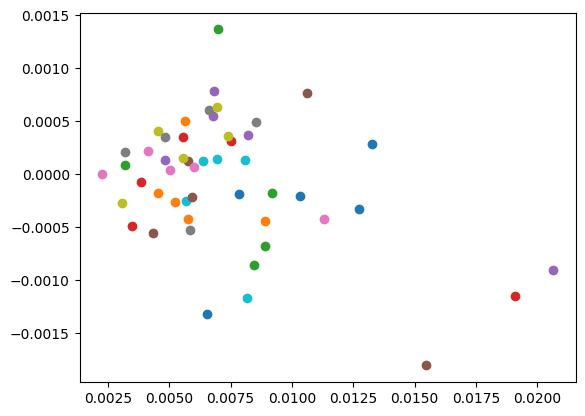

In [16]:
for i in range(0, len(E)):
    plt.scatter(STD[i], E[i])
plt.show()

In [17]:
import oapackage as oa

def pareto(E, STD):
    pareto=oa.ParetoDoubleLong()
    for ii in range(0, len(E)):
        w=oa.doubleVector( (-STD[ii], E[ii]))
        pareto.addvalue(w, ii)

    pareto.show(verbose=1)
    return pareto.allindices()

Отметим активы, оптимальные по Парето

Pareto: 9 optimal values, 9 objects


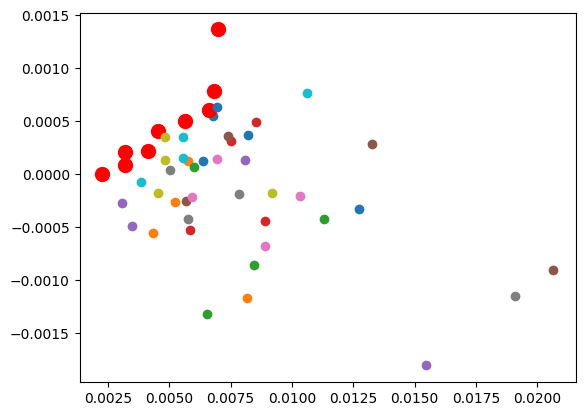

In [18]:
par_coords_E = []
par_coords_sigma = []
for i in range(len(STD)):
    par_coords_E.append(E[i])
    par_coords_sigma.append(STD[i])
poptimal = pareto(par_coords_E, par_coords_sigma)
for i in range(0, len(STD)):
    if i in poptimal:
        plt.scatter(STD[i], E[i], color = 'r', s = 100)
    else:
        plt.scatter(STD[i], E[i])
plt.show()

In [19]:
risk_price_long = {}
risk_price_long_all = {}
for i in range(len(values)):
    if i not in poptimal:
        risk_price_long[values[i]] = E[i] / STD[i]
    risk_price_long_all[values[i]] = E[i] / STD[i]

risk_price_long = {k: v for k, v in sorted(risk_price_long.items(), key=lambda item: item[1], reverse=True)}
print(risk_price_long) 

{'PG.VI': 0.09186142876919944, 'JNJ.VI': 0.08172894559842636, 'VISA.VI': 0.07362906339857145, 'NVDA.VI': 0.07261024702329232, 'ITX.VI': 0.06419211895474024, 'LRCX.VI': 0.058378919499920086, 'BROA.VI': 0.04950575385563925, 'DIS.VI': 0.04483672591461783, 'AMAT.VI': 0.04162423659735921, 'NKE.VI': 0.028293044042805814, 'VZ.VI': 0.02727557590171814, 'JPM.VI': 0.022123496278952198, 'META.VI': 0.02145540319401827, 'CAT.VI': 0.021050932580832644, 'WMT.VI': 0.01951938965408347, 'MCD.VI': 0.01653781202777025, 'KO.VI': 0.011114740242303455, 'UNH.VI': 0.00802150971393073, 'ISRG.VI': -0.01906765640093455, 'CVX.VI': -0.01957081737493246, 'INTC.VI': -0.019849035512975302, 'CMCS.VI': -0.02348417201959201, 'AAPL.VI': -0.025744039783236864, 'TXN.VI': -0.0353464883806017, 'GOOA.VI': -0.037141044246714855, 'COST.VI': -0.03791963081367972, 'TSLA.VI': -0.04350253707850283, 'IBM.VI': -0.04473227164552772, 'SAP.VI': -0.049050955792216216, 'ADBE.VI': -0.04994551404956906, 'NFLX.VI': -0.0602476986179092, 'INTU.

In [20]:
print(poptimal)

(4, 6, 7, 12, 28, 31, 36, 37, 42)


Выберем 10 оптимальных активов из множеств Парето: из первого при условии запрета коротких продаж, и из второго при условии разрешения коротких продаж

In [21]:
optimal_10_long = []
optimal_10_long_percentage = {}
keys = list(risk_price_long.keys())
for elem in poptimal:
    optimal_10_long.append(values[elem])
for i in range(10 - len(poptimal)):
    optimal_10_long.append(keys[i])
print(optimal_10_long)

for i in range(10):
    optimal_10_long_percentage[optimal_10_long[i]] = np.abs(risk_price_long_all[optimal_10_long[i]])

temp = sum(optimal_10_long_percentage.values())
for i in range(10):
    optimal_10_long_percentage[optimal_10_long[i]] = optimal_10_long_percentage[optimal_10_long[i]] / temp

print(optimal_10_long_percentage)

['AMGN.VI', 'ASML.VI', 'AXP.VI', 'CSCO.VI', 'MC.VI', 'MRK.VI', 'OR.VI', 'PFE.VI', 'SU.VI', 'PG.VI']
{'AMGN.VI': 0.13930276269954253, 'ASML.VI': 0.06591066528765892, 'AXP.VI': 0.0784619815363496, 'CSCO.VI': 0.23766588733790378, 'MC.VI': 0.10911280485051912, 'MRK.VI': 0.10829172957311958, 'OR.VI': 0.0028116318447046, 'PFE.VI': 0.11236732537750925, 'SU.VI': 0.03437679661398651, 'PG.VI': 0.1116984148787061}


Pareto: 6 optimal values, 6 objects


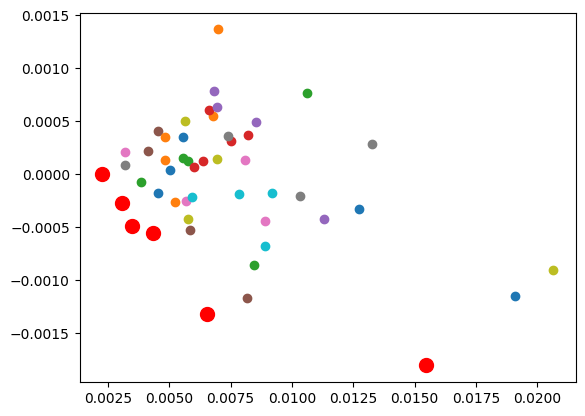

In [22]:
par_coords_E = []
par_coords_sigma = []
for i in range(len(STD)):
    par_coords_E.append(-E[i])
    par_coords_sigma.append(STD[i])
poptimal = pareto(par_coords_E, par_coords_sigma)
for i in range(0, len(STD)):
    if i in poptimal:
        plt.scatter(STD[i], E[i], color = 'r', s = 100)
    else:
        plt.scatter(STD[i], E[i])
plt.show()

In [23]:
risk_price_short = {}
risk_price_short_all = {}
for i in range(len(values)):
    if i not in poptimal:
        risk_price_short[values[i]] = E[i] / STD[i]
    risk_price_short_all[values[i]] = E[i] / STD[i]

risk_price_short = {k: v for k, v in sorted(risk_price_long.items(), key=lambda item: item[1], reverse=True)}
print(risk_price_short) 

{'PG.VI': 0.09186142876919944, 'JNJ.VI': 0.08172894559842636, 'VISA.VI': 0.07362906339857145, 'NVDA.VI': 0.07261024702329232, 'ITX.VI': 0.06419211895474024, 'LRCX.VI': 0.058378919499920086, 'BROA.VI': 0.04950575385563925, 'DIS.VI': 0.04483672591461783, 'AMAT.VI': 0.04162423659735921, 'NKE.VI': 0.028293044042805814, 'VZ.VI': 0.02727557590171814, 'JPM.VI': 0.022123496278952198, 'META.VI': 0.02145540319401827, 'CAT.VI': 0.021050932580832644, 'WMT.VI': 0.01951938965408347, 'MCD.VI': 0.01653781202777025, 'KO.VI': 0.011114740242303455, 'UNH.VI': 0.00802150971393073, 'ISRG.VI': -0.01906765640093455, 'CVX.VI': -0.01957081737493246, 'INTC.VI': -0.019849035512975302, 'CMCS.VI': -0.02348417201959201, 'AAPL.VI': -0.025744039783236864, 'TXN.VI': -0.0353464883806017, 'GOOA.VI': -0.037141044246714855, 'COST.VI': -0.03791963081367972, 'TSLA.VI': -0.04350253707850283, 'IBM.VI': -0.04473227164552772, 'SAP.VI': -0.049050955792216216, 'ADBE.VI': -0.04994551404956906, 'NFLX.VI': -0.0602476986179092, 'INTU.

In [24]:
optimal_10_short = []
optimal_10_short_percentage = {}
keys = list(risk_price_long.keys())
for elem in poptimal:
    optimal_10_short.append(values[elem])
for i in range(10 - len(poptimal)):
    optimal_10_short.append(keys[i])
print(optimal_10_short)

for i in range(10):
    optimal_10_short_percentage[optimal_10_short[i]] = np.abs(risk_price_short_all[optimal_10_short[i]])

temp = sum(optimal_10_short_percentage.values())
for i in range(10):
    optimal_10_short_percentage[optimal_10_short[i]] = optimal_10_short_percentage[optimal_10_short[i]] / temp

print(optimal_10_short_percentage)

['AMZN.VI', 'FP.VI', 'HD.VI', 'OR.VI', 'RTL.VI', 'TRE.VI', 'PG.VI', 'JNJ.VI', 'VISA.VI', 'NVDA.VI']
{'AMZN.VI': 0.11716061275524786, 'FP.VI': 0.1292937202580412, 'HD.VI': 0.08741412133981333, 'OR.VI': 0.0023239578662811434, 'RTL.VI': 0.20243421788687194, 'TRE.VI': 0.13993154825196594, 'PG.VI': 0.09232446644726933, 'JNJ.VI': 0.08214090937591209, 'VISA.VI': 0.07400019882517354, 'NVDA.VI': 0.07297624699342362}


1. Построим эффективные фронты

In [25]:
from scipy.optimize import minimize

def risk_porfolio(X, cov_matrix, n_observations=1, sqrt=True):
    if sqrt:
        return np.sqrt(np.dot(np.dot(X, cov_matrix), X.T))
    else:
        return np.dot(np.dot(X, cov_matrix), X.T) / np.sqrt(n_observations)

def optimize_portfolio(risk_porfolio,
                       returns,
                       mean_returns, 
                       cov_matrix, 
                       bounds,
                       target_return):
    X = np.ones(returns.shape[1])
    X = X / X.sum()
    bounds = bounds * returns.shape[1]
    constraints=[]
    constraints.append({'type': 'eq', 'fun': lambda X: np.sum(X) - 1.0})
    if target_return:
        constraints.append({'type': 'eq', 
                            'args': (mean_returns,), 
                            'fun': lambda X, mean_returns: target_return - np.dot(X, mean_returns)})
    return minimize(risk_porfolio, X,
                    args=(cov_matrix, returns.shape[0]), 
                    method='SLSQP',
                    constraints=constraints,
                    bounds=bounds).x

In [26]:
def get_return_mean_cov(dataframe, values): 
    r_matrix = {}
    for i in range(len(values)):
        r_matrix[values[i]] = dataframe["Profit"][values[i]]
    r_df = pd.DataFrame(r_matrix).dropna()
    return r_df.values, r_df.mean().values, r_df.cov().values

Без запрета коротких продаж:

In [27]:
psigmas = []
preturns = []
bounds = ((None, None),) 
r_matrix, mean_vec, cov_matrix = get_return_mean_cov(df, values)
X_min_risk = optimize_portfolio(risk_porfolio,
                                r_matrix,
                                mean_vec,
                                cov_matrix,
                                bounds,
                                target_return=None)
min_risk = risk_porfolio(X_min_risk, cov_matrix)
min_risk_preturn = np.dot(X_min_risk, mean_vec)
target_range = np.linspace(min_risk_preturn, 0.05, 500)
short_saved_weights = []
for i in range(500):
    X = optimize_portfolio(risk_porfolio,
                            r_matrix,
                            mean_vec,
                            cov_matrix,
                            bounds, 
                            target_return=target_range[i])
    short_saved_weights.append(X)
    psigmas.append(risk_porfolio(X, cov_matrix))
    preturns.append(np.dot(X, mean_vec))

Pareto: 7 optimal values, 7 objects


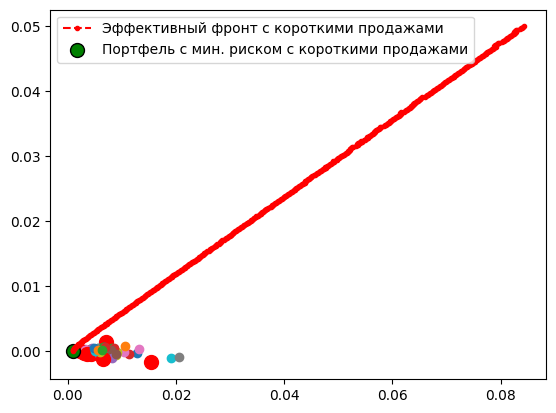

In [28]:
E_short = []
for elem in E:
    E_short.append(np.abs(elem))

poptimal_short = pareto(E_short, STD)
for i in range(0, len(E)):
    if i in poptimal_short:
        plt.scatter(STD[i], E[i], c='red', s=100)
    else:
        plt.scatter(STD[i], E[i])
plt.plot(psigmas, preturns, 'r.--', label='Эффективный фронт с короткими продажами')
plt.scatter(min_risk, 
            min_risk_preturn,
            c='green',
            s=100, 
            edgecolors='black',
            label='Портфель с мин. риском с короткими продажами')
plt.legend()
plt.show()

С запретом коротких продаж:

In [29]:
psigmas_ns = []
preturns_ns = []
bounds = ((0.0, 1.0),) 
r_matrix, mean_vec, cov_matrix = get_return_mean_cov(df, values)


X_min_risk_ns = optimize_portfolio(risk_porfolio,
                                   r_matrix,
                                   mean_vec,
                                   cov_matrix,
                                   bounds,
                                   target_return=None)
min_risk_ns = risk_porfolio(X_min_risk_ns, cov_matrix)
min_risk_preturn_ns = np.dot(X_min_risk_ns, mean_vec)
target_range = np.linspace(min_risk_preturn_ns, 0.1, 500)

saved_weights = []

for i in range(500):
    X_ns = optimize_portfolio(risk_porfolio,
                                       r_matrix,
                                       mean_vec,
                                       cov_matrix,
                                       bounds, 
                                       target_return=target_range[i])
    saved_weights.append(X_ns)
    psigmas_ns.append(risk_porfolio(X_ns, cov_matrix))
    preturns_ns.append(np.dot(X_ns, mean_vec))

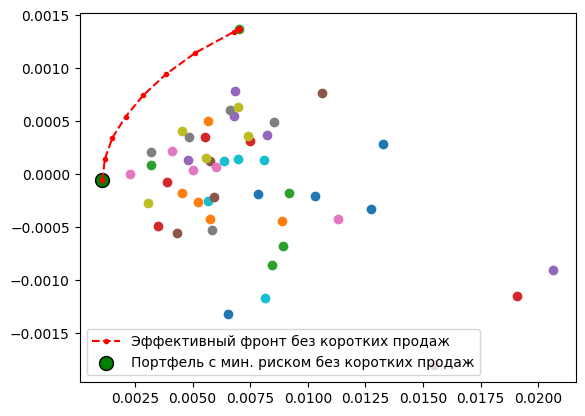

In [30]:
for i in range(0, len(STD)):
    plt.scatter(STD[i], E[i])
plt.plot(psigmas_ns, preturns_ns, 'r.--', label='Эффективный фронт без коротких продаж')
plt.scatter(min_risk_ns, 
            min_risk_preturn_ns,
            c='green',
            s=100, 
            edgecolors='black',
            label='Портфель с мин. риском без коротких продаж')
plt.legend()
plt.legend()
plt.show()

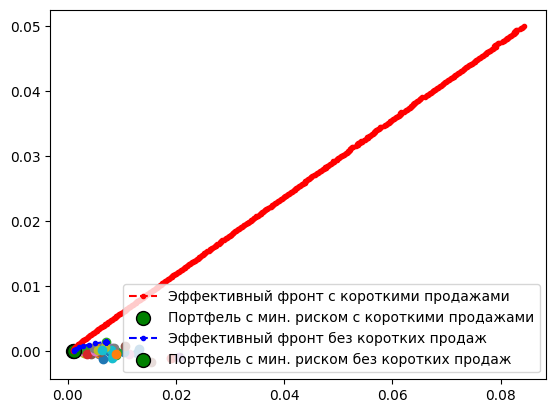

In [31]:
for i in range(0, len(E)):
    plt.scatter(STD[i], E[i])
plt.plot(psigmas, preturns, 'r.--', label='Эффективный фронт с короткими продажами')
plt.scatter(min_risk, 
            min_risk_preturn,
            c='green',
            s=100, 
            edgecolors='black',
            label='Портфель с мин. риском с короткими продажами')
plt.plot(psigmas_ns, preturns_ns, 'b.--', label='Эффективный фронт без коротких продаж')
plt.scatter(min_risk_ns, 
            min_risk_preturn_ns,
            c='green',
            s=100, 
            edgecolors='black',
            label='Портфель с мин. риском без коротких продаж')
plt.legend()
plt.legend()
plt.show()

Эффективный фронт с запретом на короткие продажи находится ниже, чем эффективный фронт без запрета на них

2. Построим "хорошие инвестиционные портфели"

ПОИСК ОПТИМАЛЬНЫХ ПО ПАРЕТО АКТИВОВ

In [32]:
portfolio_risks = []
portfolio_risks_short = []
for i in range(len(saved_weights)):
    portfolio_risks.append(risk_porfolio(np.array(saved_weights[i]), cov_matrix))
    portfolio_risks_short.append(risk_porfolio(np.array(short_saved_weights[i]), cov_matrix))
portfolio_profits = []
portfolio_profits_short = []
for i in range(len(saved_weights)):
    temp = 0
    temp_1 = 0
    for j in range(len(saved_weights[i])):
        temp += find_final_profit(df["Profit"][values[j]])*saved_weights[i][j]
        temp_1 += find_final_profit(df["Profit"][values[j]])*short_saved_weights[i][j]
    portfolio_profits.append(temp)
    portfolio_profits_short.append(temp_1)

Pareto: 22 optimal values, 22 objects
Pareto: 474 optimal values, 474 objects


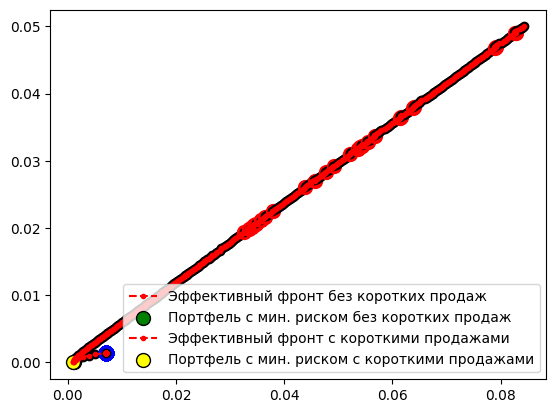

In [33]:
poptimal = pareto(portfolio_profits, portfolio_risks)
for i in range(0, len(portfolio_profits)):
    if i in poptimal:
        plt.scatter(portfolio_risks[i], portfolio_profits[i], c='black')
    else:
        plt.scatter(portfolio_risks[i], portfolio_profits[i], c='blue',s=100)
plt.plot(psigmas_ns, preturns_ns, 'r.--', label='Эффективный фронт без коротких продаж')
plt.scatter(min_risk_ns, 
            min_risk_preturn_ns,
            c='green',
            s=100, 
            edgecolors='black',
            label='Портфель с мин. риском без коротких продаж')
poptimal = pareto(portfolio_profits_short, portfolio_risks_short)
for i in range(0, len(portfolio_profits_short)):
    if i in poptimal:
        plt.scatter(portfolio_risks_short[i], portfolio_profits_short[i], c='black')
    else:
        plt.scatter(portfolio_risks_short[i], portfolio_profits_short[i], c='red',s=100)
plt.plot(psigmas, preturns, 'r.--', label='Эффективный фронт с короткими продажами')
plt.scatter(min_risk, 
            min_risk_preturn,
            c='yellow',
            s=100, 
            edgecolors='black',
            label='Портфель с мин. риском с короткими продажами')
plt.legend()
plt.show()

In [34]:
print(optimal_10_long)
print(optimal_10_short)

['AMGN.VI', 'ASML.VI', 'AXP.VI', 'CSCO.VI', 'MC.VI', 'MRK.VI', 'OR.VI', 'PFE.VI', 'SU.VI', 'PG.VI']
['AMZN.VI', 'FP.VI', 'HD.VI', 'OR.VI', 'RTL.VI', 'TRE.VI', 'PG.VI', 'JNJ.VI', 'VISA.VI', 'NVDA.VI']


In [35]:
df_short_ten = df.copy()
to_drop = []
for column in df_short_ten.columns:
    if column[1] not in optimal_10_short:
        to_drop.append(column)
df_short_ten = df_short_ten.drop(to_drop, axis = 1)

df_long_ten = df.copy()
to_drop = []
for column in df_long_ten.columns:
    if column[1] not in optimal_10_long:
        to_drop.append(column)
df_long_ten = df_long_ten.drop(to_drop, axis = 1)
print(df_long_ten.shape, df_short_ten.shape)

(248, 30) (248, 30)


In [36]:
short_ten_psigmas = []
short_ten_preturns = []
bounds = ((None, None),) 
r_matrix, mean_vec, cov_matrix = get_return_mean_cov(df_short_ten, optimal_10_short)
X_min_risk = optimize_portfolio(risk_porfolio,
                                r_matrix,
                                mean_vec,
                                cov_matrix,
                                bounds,
                                target_return=None)
short_ten_min_risk = risk_porfolio(X_min_risk, cov_matrix)
short_ten_min_risk_preturn = np.dot(X_min_risk, mean_vec)
target_range = np.linspace(min_risk_preturn, 0.05, 500)
ten_short_saved_weights = []
for i in range(500):
    X = optimize_portfolio(risk_porfolio,
                            r_matrix,
                            mean_vec,
                            cov_matrix,
                            bounds, 
                            target_return=target_range[i])
    ten_short_saved_weights.append(X)
    short_ten_psigmas.append(risk_porfolio(X, cov_matrix))
    short_ten_preturns.append(np.dot(X, mean_vec))

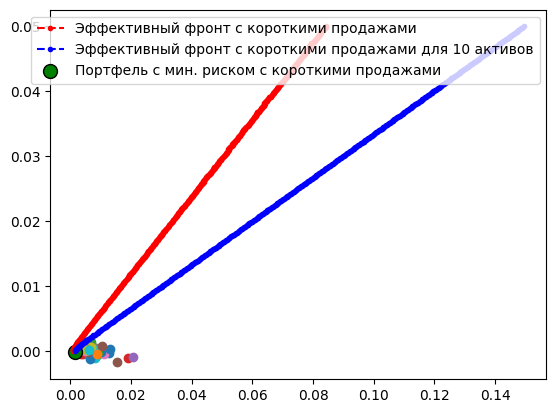

In [37]:
E_short_ten = []
for elem in E:
    E_short_ten.append(np.abs(elem))

for i in range(0, len(E)):
    plt.scatter(STD[i], E[i])
plt.plot(psigmas, preturns, 'r.--', label='Эффективный фронт с короткими продажами')
plt.plot(short_ten_psigmas, short_ten_preturns, 'b.--', label='Эффективный фронт с короткими продажами для 10 активов')
plt.scatter(short_ten_min_risk, 
            short_ten_min_risk_preturn,
            c='green',
            s=100, 
            edgecolors='black',
            label='Портфель с мин. риском с короткими продажами')
plt.legend()
plt.show()

In [38]:
long_ten_psigmas = []
long_ten_preturns = []
bounds = ((0.0, 1.0),) 
r_matrix, mean_vec, cov_matrix = get_return_mean_cov(df_long_ten, optimal_10_long)
X_min_risk = optimize_portfolio(risk_porfolio,
                                r_matrix,
                                mean_vec,
                                cov_matrix,
                                bounds,
                                target_return=None)
long_ten_min_risk = risk_porfolio(X_min_risk, cov_matrix)
long_ten_min_risk_preturn = np.dot(X_min_risk, mean_vec)
target_range = np.linspace(min_risk_preturn, 0.05, 500)
ten_long_saved_weights = []
for i in range(500):
    X = optimize_portfolio(risk_porfolio,
                            r_matrix,
                            mean_vec,
                            cov_matrix,
                            bounds, 
                            target_return=target_range[i])
    ten_long_saved_weights.append(X)
    long_ten_psigmas.append(risk_porfolio(X, cov_matrix))
    long_ten_preturns.append(np.dot(X, mean_vec))

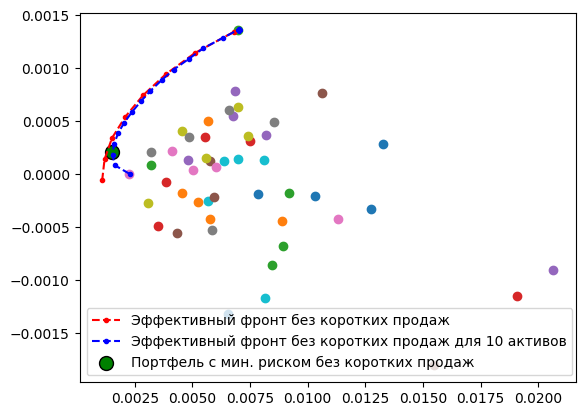

In [39]:
E_long_ten = []
for elem in E:
    E_long_ten.append(np.abs(elem))

for i in range(0, len(E)):
    plt.scatter(STD[i], E[i])
plt.plot(psigmas_ns, preturns_ns, 'r.--', label='Эффективный фронт без коротких продаж')
plt.plot(long_ten_psigmas, long_ten_preturns, 'b.--', label='Эффективный фронт без коротких продаж для 10 активов')
plt.scatter(long_ten_min_risk, 
            long_ten_min_risk_preturn,
            c='green',
            s=100, 
            edgecolors='black',
            label='Портфель с мин. риском без коротких продаж')
plt.legend()
plt.show()

3. Оценка VaR активов

In [40]:
def find_VaR(list, confidence, coef = 1):
    varisk = 0
    for i in range(len(list)):
        list[i] = list[i] * coef
    list.sort()
    list = np.array(list)
    for elem in list:
        temp_var = len(list[list <= -1 * elem]) / len(list)
        if temp_var >= confidence:
           varisk = elem
    return varisk      

In [41]:
VAR = []
for elem in values:
    var = df["Profit"][elem].to_list()
    for i in range(len(var)):
        var[i] = float(var[i])
    VAR.append(find_VaR(var,0.95))
print(VAR)

[-0.01691617164542647, -0.008157321502861414, -0.012225838317649007, -0.013556161838512715, -0.014786673902496439, -0.018357678472187722, -0.0037064536325459585, -0.0026771318155462964, -0.009247091013193653, -0.015193243046816463, -0.010366578468994803, -0.0025617250224536647, -0.01571086454360282, -0.0031562536851055256, -0.014572170068761103, -0.0031299028023612507, -0.018966310997566627, -0.007192453787574493, -0.0022176538364542253, -0.009660371124466494, -0.017538641243956654, -0.0033087611627085067, -0.012436725187618514, -0.001582941161664575, -0.011449882964376101, -0.011111225425071147, -0.01015467955371907, -0.014073109223468272, -0.010582109330536937, -0.012767565307559181, -0.023920179658384555, -0.01055117890416124, -0.015205782637374377, -0.028104894320108542, -0.00633975940140008, -0.02162246401316592, 0.0, -0.01180649239048881, -0.013133571161228375, -0.007971535132802465, 0.0, -0.012231340598686025, -0.006519170018937537, 0.0, -0.035136971491424696, -0.006565500159414

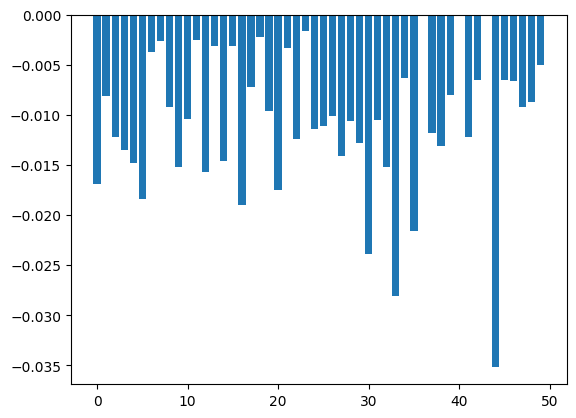

In [42]:
plt.bar(list(i for i in range(0, len(VAR))), list(VAR[i] for i in range(0, len(VAR)))) 
plt.show()

In [43]:
df_short_copy = df.copy(deep = True)

for elem in values:
    for i in range (len(df_short_copy['Profit'][elem])):
        df_short_copy.loc[:, ('Profit', elem)][i] = -1 * df['Profit'][elem][i]
print(df_short_copy['Profit'].head())

Ticker       AAPL.VI   ADBE.VI  AIR.VI   AMAT.VI  AMGN.VI   AMZN.VI  ASML.VI  \
Date                                                                           
2018-01-02 -0.000000 -0.000000    -0.0 -0.000000     -0.0 -0.000000 -0.00000   
2018-01-03 -0.000000 -0.000000    -0.0 -0.000000     -0.0 -0.000000 -0.00000   
2018-01-04 -0.004187 -0.009917    -0.0 -0.006645     -0.0 -0.000000 -0.00000   
2018-01-05 -0.013851 -0.013072    -0.0 -0.002205     -0.0 -0.005946 -0.00000   
2018-01-08 -0.001369 -0.003231    -0.0 -0.000000     -0.0 -0.013527 -0.00915   

Ticker        AXP.VI   BROA.VI    CAT.VI  ...  RTL.VI    SAP.VI  SU.VI  \
Date                                      ...                            
2018-01-02 -0.000000 -0.000000 -0.000000  ...    -0.0 -0.000000   -0.0   
2018-01-03 -0.000000 -0.000000 -0.000000  ...    -0.0 -0.000000   -0.0   
2018-01-04 -0.000000 -0.000000 -0.003824  ...    -0.0 -0.007073   -0.0   
2018-01-05 -0.011976 -0.000000 -0.007519  ...    -0.0 -0.000000   -0.

In [44]:
VAR_short = []
for elem in values:
    var = df_short_copy["Profit"][elem].to_list()
    for i in range(len(var)):
        var[i] = float(var[i])
    VAR_short.append(find_VaR(var,0.95))
print(VAR_short)

[-0.019776479199793418, -0.009917436657346457, -0.016622994388452383, -0.004602223418853413, -0.009752289381490975, -0.02782785608057825, -0.0, -0.0, -0.008810629682154847, -0.010906288085708482, -0.009532996943742766, -0.0002528093549329924, -0.008646767436875091, -0.0012873633187266975, -0.01323016170548108, -0.008221317562707053, -0.023640550684561834, -0.012399892402458867, -0.004659587182636926, -0.00918880780460718, -0.016947536630038673, -0.007722046093910251, -0.011560844579548757, -0.0, -0.009640400864340926, -0.009680345778332544, -0.011065495273708148, -0.010257843405278244, -0.005916164480132657, -0.016526657674710066, -0.020381136659378463, -0.008030662080124706, -0.017651551648778074, -0.037824308667339324, -0.005767346893200909, -0.017112831830503605, -0.0, -0.011542280742720568, -0.010447007954582865, -0.01944713164273182, -0.014953606712449385, -0.01430328114990509, -0.0, -0.0, -0.04198790459135893, -0.009193414225678431, -0.010365930840950277, -0.0054789190223187845, 

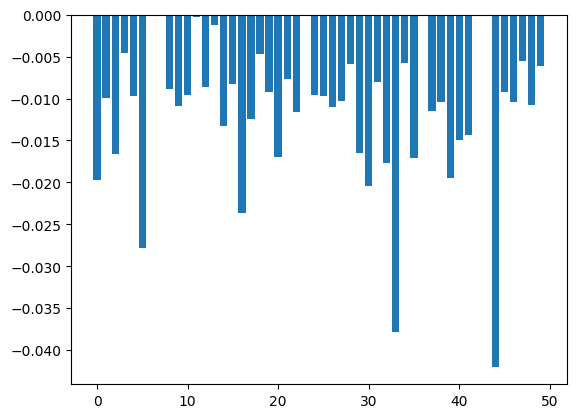

In [45]:
plt.bar(list(i for i in range(0, len(VAR_short))), list(VAR_short[i] for i in range(0, len(VAR_short)))) 
plt.show()

Посчитаем VaR для активов с запретом на короткие продажи

[-1.4140368564584796e-20, -1.0061648915819702e-20, -9.800607025671034e-21, 0.0, 0.0, 0.0, -0.0002451267142553488, -0.0002643071076476835, 0.0, -1.8985445639386204e-21, -6.902251379083657e-05, -4.2317846785402656e-05, 0.0, -0.0003045407189900797, 0.0, -0.0001320872749184548, 0.0, -0.00028728070768310624, -0.00018898977811869342, -4.756369603303286e-21, 0.0, 0.0, -2.158299561684246e-20, -5.368984816273177e-05, -8.413581594591294e-21, -0.00017611924438134353, 0.0, 0.0, -0.0003617453934793497, -0.00026220327725451456, 0.0, 0.0, 0.0, -9.687747106249054e-20, -0.00021650178648311997, -3.712384867679426e-21, 0.0, -0.00010144366863418168, 0.0, -6.433293096041105e-05, 0.0, 0.0, -0.00044085248432700427, 0.0, 0.0, -7.605951991993985e-07, -4.0252866915044e-22, 0.0, -0.000546379150968197, -3.4872308619053777e-06, 0.0, -0.000546379150968197, -7.522376545803128e-05]


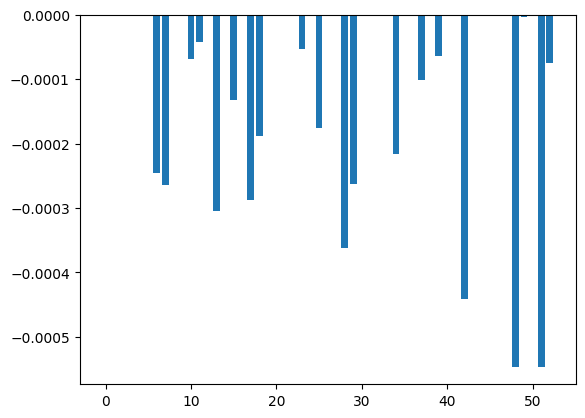

In [46]:
chosen = poptimal[0]

VAR = []

for elem in values:
    var = df["Profit"][elem].to_list()
    for i in range(len(var)):
        var[i] = float(var[i])
    VAR.append(find_VaR(var, 0.95, saved_weights[chosen][values.index(elem)]))
max_VaR = np.max(VAR)
min_VaR = np.min(VAR)
average_VaR = np.mean(VAR)
VAR.append(max_VaR)
VAR.append(min_VaR)
VAR.append(average_VaR)
print(VAR)
plt.bar(list(i for i in range(0, len(VAR))), VAR)
plt.show()

А теперь для активов без запрета коротких продаж

[-9.83867541807709e-05, -0.0002855272371995051, -0.000336212029123423, -1.7901816559217117e-05, -0.00037733447042703376, -0.0005726739659176822, -0.00024714930642956185, -0.00034624058994262073, -7.777914102374389e-05, -7.231032924236261e-05, -0.0002564898945271408, -1.2799401534259744e-06, -0.0013905475461867356, -0.00019813887323870015, -0.00028982193839758463, -1.199607635263645e-05, -0.0009952764695347826, -0.00020144233162317385, -0.00011599089518087766, -0.0004998341334551259, -0.00037408325369321025, -0.00013988303288273033, -1.9340826633534458e-05, -6.30612753789437e-05, -6.27291523239078e-05, -0.0002110522358957603, -0.0002855586171226573, -0.0002470209230974903, -0.0006950702890347902, -0.00030028325737785474, -0.0005754191646900093, -0.00044124503412627076, -0.00025036497199177054, -0.00046497270614606726, -0.00041669708722803594, -0.0006482469156709307, 0.0, -0.0003810654876038247, -0.00032490219559492693, -0.0006419297089233721, -0.0005420309489306406, -1.824819828929388e-

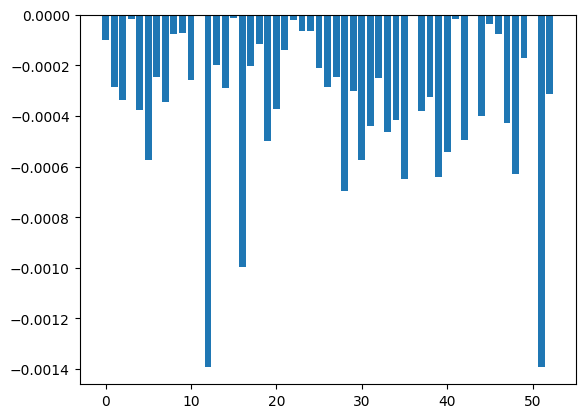

In [47]:
chosen = poptimal_short[0]

VAR = []

for elem in values:
    var = df["Profit"][elem].to_list()
    for i in range(len(var)):
        var[i] = float(var[i])
    VAR.append(find_VaR(var, 0.95, short_saved_weights[chosen][values.index(elem)]))
max_VaR = np.max(VAR)
min_VaR = np.min(VAR)
average_VaR = np.mean(VAR)
VAR.append(max_VaR)
VAR.append(min_VaR)
VAR.append(average_VaR)
print(VAR)
plt.bar(list(i for i in range(0, len(VAR))), VAR)
plt.show()

По графикам видно, что VaR стал значительно больше при разрешении коротких продаж

4. Портфель Марковица

Для активов без запрета коротких продаж

In [48]:
risk_free = sorted(optimal_10_short_percentage.items(), key=lambda x: x[1])
risk_free

[('OR.VI', 0.0023239578662811434),
 ('NVDA.VI', 0.07297624699342362),
 ('VISA.VI', 0.07400019882517354),
 ('JNJ.VI', 0.08214090937591209),
 ('HD.VI', 0.08741412133981333),
 ('PG.VI', 0.09232446644726933),
 ('AMZN.VI', 0.11716061275524786),
 ('FP.VI', 0.1292937202580412),
 ('TRE.VI', 0.13993154825196594),
 ('RTL.VI', 0.20243421788687194)]

In [75]:
risk_free_active = [np.abs(np.max(E) - 25 * abs(np.mean(E)))]*len(df["Profit"]["OR.VI"])


In [76]:
print(risk_free_active)

[0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.00023482966532731167, 0.0002348296653

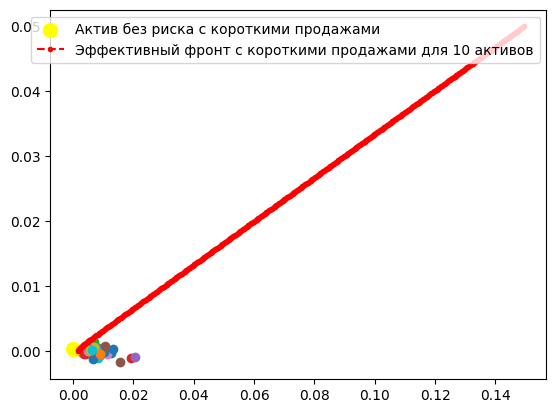

In [77]:
for i in range(0, len(E)):
    plt.scatter(STD[i], E[i])
plt.scatter(0, risk_free_active[0], c = "yellow", s = 100, label='Актив без риска с короткими продажами')
plt.plot(short_ten_psigmas, short_ten_preturns, 'r.--', label='Эффективный фронт c короткими продажами для 10 активов')
plt.legend()
plt.show()

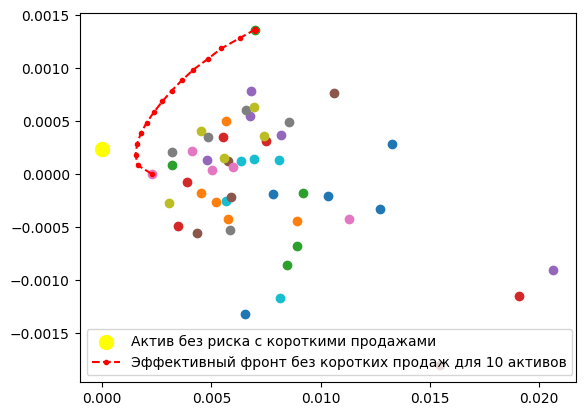

In [78]:
for i in range(0, len(E)):
    plt.scatter(STD[i], E[i])
plt.scatter(0, risk_free_active[0], c = "yellow", s = 100, label='Актив без риска с короткими продажами')
plt.plot(long_ten_psigmas, long_ten_preturns, 'r.--', label='Эффективный фронт без коротких продаж для 10 активов')
plt.legend()
plt.show()

In [52]:
risk_free = dict((x, y) for x, y in risk_free)
risk_value = risk_free["OR.VI"]
del risk_free['OR.VI']

In [53]:
risk_free["no_risk"] = risk_value

In [54]:
free_by_profit = {}
for i in range(len(list(risk_free.keys())) - 1):
    free_by_profit[list(risk_free.keys())[i]] = abs(find_final_profit(df[('Profit', list(risk_free.keys())[i])]))
free_by_profit = {k: v for k, v in sorted(free_by_profit.items(), key=lambda item: item[1], reverse=True)}
print(free_by_profit)
print(risk_free_active[0])

{'AMZN.VI': 0.0018026262947750634, 'RTL.VI': 0.001318672428844436, 'NVDA.VI': 0.000770352651154085, 'PG.VI': 0.0006387562210177867, 'FP.VI': 0.0005563691056768303, 'JNJ.VI': 0.000553738958403558, 'TRE.VI': 0.0004857246254048472, 'VISA.VI': 0.0003556316077773782, 'HD.VI': 0.00026792683828211113}
-0.00023482966532731167


In [55]:
risk_free['TRE.VI'], risk_free['no_risk'] = risk_free['no_risk'], risk_free['TRE.VI']
print(risk_free)

{'NVDA.VI': 0.07297624699342362, 'VISA.VI': 0.07400019882517354, 'JNJ.VI': 0.08214090937591209, 'HD.VI': 0.08741412133981333, 'PG.VI': 0.09232446644726933, 'AMZN.VI': 0.11716061275524786, 'FP.VI': 0.1292937202580412, 'TRE.VI': 0.0023239578662811434, 'RTL.VI': 0.20243421788687194, 'no_risk': 0.13993154825196594}


In [56]:
list_risk = []
for i in range(len(df)):
    list_risk.append(0)
    for elem in risk_free.keys():
        if elem == "no_risk":
            list_risk[i]+=risk_free_active[i]*risk_free[elem]
        else:
            list_risk[i]+=df["Profit"][elem][i]*risk_free[elem]
risk_free_VaR = find_VaR(list_risk, 0.95)
print(risk_free_VaR)


-0.0044827261279109226


Для активов с запретом коротких продаж

In [57]:
risk_free_long = {}
for elem in sorted(optimal_10_long_percentage.items(), key=lambda x: x[1]):
    risk_free_long[elem[0]] = elem[1]
risk_free_long

{'OR.VI': 0.0028116318447046,
 'SU.VI': 0.03437679661398651,
 'ASML.VI': 0.06591066528765892,
 'AXP.VI': 0.0784619815363496,
 'MRK.VI': 0.10829172957311958,
 'MC.VI': 0.10911280485051912,
 'PG.VI': 0.1116984148787061,
 'PFE.VI': 0.11236732537750925,
 'AMGN.VI': 0.13930276269954253,
 'CSCO.VI': 0.23766588733790378}

In [58]:
free_by_profit = {}
for i in range(len(list(risk_free_long.keys())) - 1):
    free_by_profit[list(risk_free_long.keys())[i]] = abs(find_final_profit(df[('Profit', list(risk_free_long.keys())[i])]))
free_by_profit = {k: v for k, v in sorted(free_by_profit.items(), key=lambda item: item[1], reverse=True)}
print(free_by_profit)
print(risk_free_active[0])

{'AMGN.VI': 0.0007831343963448771, 'PG.VI': 0.0006387562210177867, 'PFE.VI': 0.0006101473560857218, 'MRK.VI': 0.0005041581548917894, 'MC.VI': 0.00040642673634648475, 'ASML.VI': 0.0002229935003700207, 'AXP.VI': 0.00020691935162005462, 'SU.VI': 9.046776748846614e-05, 'OR.VI': 5.23632693051657e-06}
-0.00023482966532731167


In [59]:
risk_free_long['no_risk'] = risk_free_long['OR.VI']
del risk_free_long['OR.VI']
risk_free_long['MC.VI'], risk_free_long['no_risk'] = risk_free_long['no_risk'], risk_free_long['MC.VI']
print(risk_free_long)

{'SU.VI': 0.03437679661398651, 'ASML.VI': 0.06591066528765892, 'AXP.VI': 0.0784619815363496, 'MRK.VI': 0.10829172957311958, 'MC.VI': 0.0028116318447046, 'PG.VI': 0.1116984148787061, 'PFE.VI': 0.11236732537750925, 'AMGN.VI': 0.13930276269954253, 'CSCO.VI': 0.23766588733790378, 'no_risk': 0.10911280485051912}


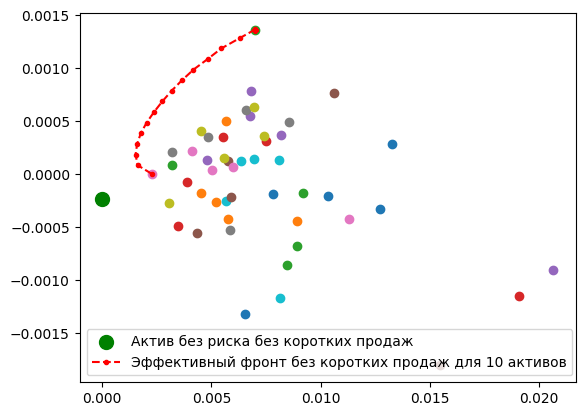

In [60]:
for i in range(0, len(E)):
    plt.scatter(STD[i], E[i])
plt.scatter(0, risk_free_active[0], c = "green", s = 100, label='Актив без риска без коротких продаж')
plt.plot(long_ten_psigmas, long_ten_preturns, 'r.--', label='Эффективный фронт без коротких продаж для 10 активов')
plt.legend()
plt.show()

In [61]:
def find_portfolio_var(df, symbols, ratio, risk_free_active = 0):
    list_risk = []
    for i in range(len(df)):
        list_risk.append(0)
        for j in range(len(symbols)):
            if elem == "no_risk":
                list_risk[i]+=risk_free_active[i]*ratio[j]
            else:
                list_risk[i]+=df["Profit"][symbols[j]][i]*ratio[j]
    VaR = find_VaR(list_risk, 0.95)
    return VaR

In [62]:
list_risk = []
for i in range(len(df)):
    list_risk.append(0)
    for elem in risk_free_long.keys():
        if elem == "no_risk":
            list_risk[i]+=risk_free_active[i]*risk_free_long[elem]
        else:
            list_risk[i]+=df["Profit"][elem][i]*risk_free_long[elem]
risk_free_long_VaR = find_VaR(list_risk, 0.95)
print(risk_free_long_VaR)


-0.005497311039664254


In [63]:
ratio_2 = generate_portfolios(10, 2)
ratio_3 = generate_portfolios(10, 3)

In [64]:
print(sum(ratio_2[0]), sum(ratio_3[0]))

0.9999830649121915 0.9999990463256836


In [65]:
long_vars = []
for elem in ratio_2:
    long_vars.append(find_portfolio_var(df, optimal_10_long, elem))
print(long_vars)

[-0.0097602812368968, -0.010817012029487788, -0.005318007754257187, -0.00844055291123373, -0.0030449838579574315, -0.007648495143237903, -0.007021165242284073, -0.01326865334233299, -0.004422884447444329, -0.004117307538316728]


In [66]:
for elem in ratio_3:
    long_vars.append(find_portfolio_var(df, optimal_10_long, elem))

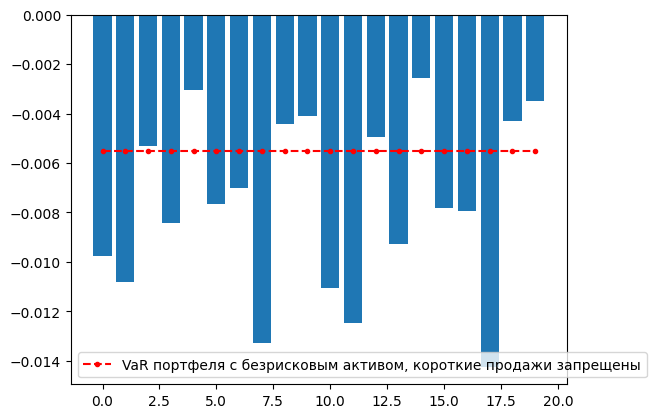

In [67]:
plt.bar(list(i for i in range(0, len(long_vars))), long_vars)
plt.plot(list(i for i in range(0, len(long_vars))), [risk_free_long_VaR] * len(long_vars), 'r.--', label='VaR портфеля с безрисковым активом, короткие продажи запрещены')
plt.legend()
plt.show()

In [68]:
short_vars = []
for elem in ratio_2:
    short_vars.append(find_portfolio_var(df, optimal_10_short, elem))
for elem in ratio_3:
    short_vars.append(find_portfolio_var(df, optimal_10_short, elem))

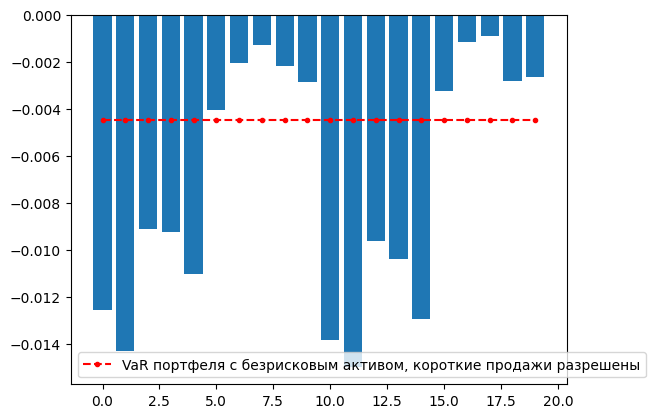

In [69]:
plt.bar(list(i for i in range(0, len(short_vars))), short_vars)
plt.plot(list(i for i in range(0, len(short_vars))), [risk_free_VaR] * len(short_vars), 'r.--', label='VaR портфеля с безрисковым активом, короткие продажи разрешены')
plt.legend()
plt.show()

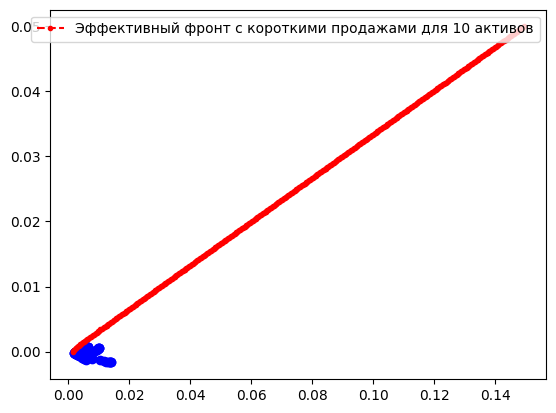

In [81]:
trash_values, trash_mean, covariation_ten = get_return_mean_cov(df, optimal_10_short)
ratio_general = []
for i in range(0, 10):
    ratio_general += generate_portfolios(10, i + 1)
ratio_general += generate_current_previous(10)
portfolio_profits_test = []
portfolio_risks_test = []
for elem in ratio_general:
    portfolio_profits_test.append(find_portfolio_profit(df, optimal_10_short, elem))
    portfolio_risks_test.append(risk_porfolio(np.array(elem), covariation_ten))


for i in range(0, len(portfolio_profits_test)):
    plt.scatter(portfolio_risks_test[i], portfolio_profits_test[i], color = 'b')
plt.plot(short_ten_psigmas, short_ten_preturns, 'r.--', label='Эффективный фронт с короткими продажами для 10 активов')
plt.legend()
plt.show()

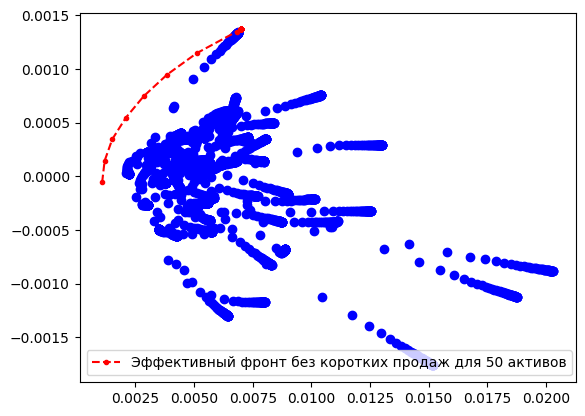

In [82]:
trash_values, trash_mean, covariation_ten = get_return_mean_cov(df, values)
ratio_general = []
for i in range(0, 50):
    ratio_general += generate_portfolios(50, i + 1)
ratio_general += generate_current_previous(50)
portfolio_profits_test = []
portfolio_risks_test = []
for elem in ratio_general:
    portfolio_profits_test.append(find_portfolio_profit(df, values, elem))
    portfolio_risks_test.append(risk_porfolio(np.array(elem), covariation_ten))


for i in range(0, len(portfolio_profits_test)):
    plt.scatter(portfolio_risks_test[i], portfolio_profits_test[i], color = 'b')
plt.plot(psigmas_ns, preturns_ns, 'r.--', label='Эффективный фронт без коротких продаж для 50 активов')
plt.legend()
plt.show()

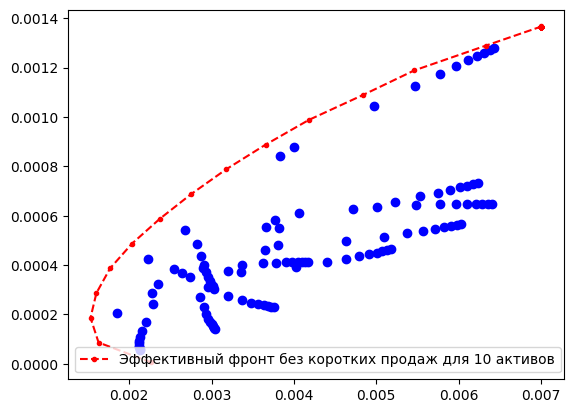

In [83]:
trash_values, trash_mean, covariation_ten = get_return_mean_cov(df, optimal_10_long)
ratio_general = []
for i in range(0, 10):
    ratio_general += generate_portfolios(10, i + 1)
ratio_general += generate_current_previous(10)
portfolio_profits_test = []
portfolio_risks_test = []
for elem in ratio_general:
    portfolio_profits_test.append(find_portfolio_profit(df, optimal_10_long, elem))
    portfolio_risks_test.append(risk_porfolio(np.array(elem), covariation_ten))


for i in range(0, len(portfolio_profits_test)):
    plt.scatter(portfolio_risks_test[i], portfolio_profits_test[i], color = 'b')
plt.plot(long_ten_psigmas, long_ten_preturns, 'r.--', label='Эффективный фронт без коротких продаж для 10 активов')
plt.legend()
plt.show()

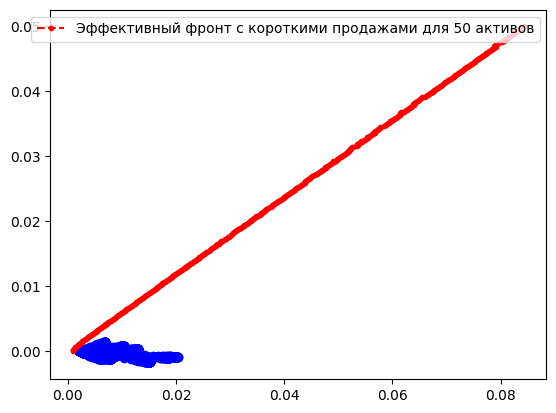

In [84]:
trash_values, trash_mean, covariation_ten = get_return_mean_cov(df, values)
ratio_general = []
for i in range(0, 50):
    ratio_general += generate_portfolios(50, i + 1)
ratio_general += generate_current_previous(50)
portfolio_profits_test = []
portfolio_risks_test = []
for elem in ratio_general:
    portfolio_profits_test.append(find_portfolio_profit(df, values, elem))
    portfolio_risks_test.append(risk_porfolio(np.array(elem), covariation_ten))


for i in range(0, len(portfolio_profits_test)):
    plt.scatter(portfolio_risks_test[i], portfolio_profits_test[i], color = 'b')
plt.plot(psigmas, preturns, 'r.--', label='Эффективный фронт c короткими продажами для 50 активов')
plt.legend()
plt.show()

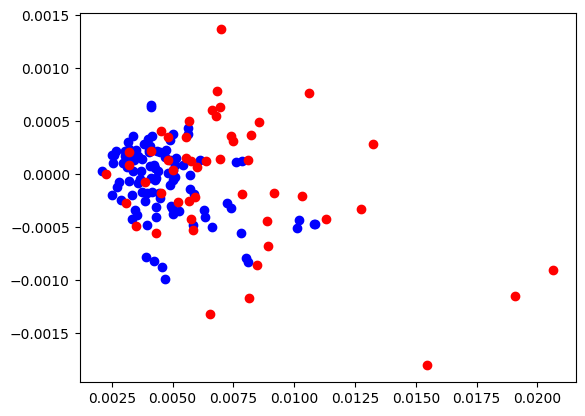

In [93]:
trash_values, trash_mean, covariation_ten = get_return_mean_cov(df, values)
ratio_general = []

ratio_general += generate_portfolios(50, 1)
ratio_general += generate_current_previous(50)
portfolio_profits_test = []
portfolio_risks_test = []
for elem in ratio_general:
    portfolio_profits_test.append(find_portfolio_profit(df, values, elem))
    portfolio_risks_test.append(risk_porfolio(np.array(elem), covariation_ten))
for i in range(0, len(portfolio_profits_test)):
    plt.scatter(portfolio_risks_test[i], portfolio_profits_test[i], color = 'b')
for i in range(0, len(values)):
    plt.scatter(STD[i], E[i], color = 'r')
plt.show()

Красным цветом на рисунке обозначены акции, а синим - портфели

Как можем заметить, при увеличении параметра param в генерации портфелей, портфели отдаляются от линии эффективного фронта 